# **Tugas HO 1**

## Soal 1: 
### Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:


#### Import Library

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave
import librosa
import librosa.display
from scipy.signal import find_peaks


In [6]:
data_type = np.int16 
figure_size = (25, 7) 
fig_linestyle = "-" 
fig_linewidth = 1 
specto_format = '%+2.0f dB' 

### **Pengujian Audio dengan Volume Relatif Rendah**

#### Visualisasi Audio dengan Waveforms

In [5]:
import os
audio_sample = os.path.join(os.getcwd(), 'audio_samples', 'audio1.wav')  
if not os.path.exists(audio_sample):
    print('File tidak ditemukan')
    exit()

print('File ditemukan:', audio_sample)

File ditemukan: C:\Users\bintx\OneDrive\Documents\ITERA\Teknologi Multimedia (IF4021)\audio_samples\audio1.wav


In [6]:
with wave.open(audio_sample, 'r') as wav_file:
 frames = wav_file.readframes(-1)
 audio_data = np.frombuffer(frames, dtype=data_type)
 audio_sampling_rate = wav_file.getframerate() 
 n_channels = wav_file.getnchannels()
 sample_width = wav_file.getsampwidth()
 bit_depth = sample_width * 8

In [7]:
sample_len_audio = len(audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")

Panjang data audio: 1323742
Durasi audio: 30.016825396825396 detik


In [8]:
print(f"Isi data audio: {audio_data}")
print(f"Panjang data audio: {len(audio_data)}")
print(f"Sampling rate: {audio_sampling_rate}")
print(f"Jumlah channel: {n_channels}")
print(f"Audio bit-depth: {bit_depth}")

Isi data audio: [  0   0   0 ...  28 -30  32]
Panjang data audio: 1323742
Sampling rate: 44100
Jumlah channel: 2
Audio bit-depth: 16


In [9]:
sample_len_audio = len(audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")

Panjang data audio: 1323742
Durasi audio: 30.016825396825396 detik


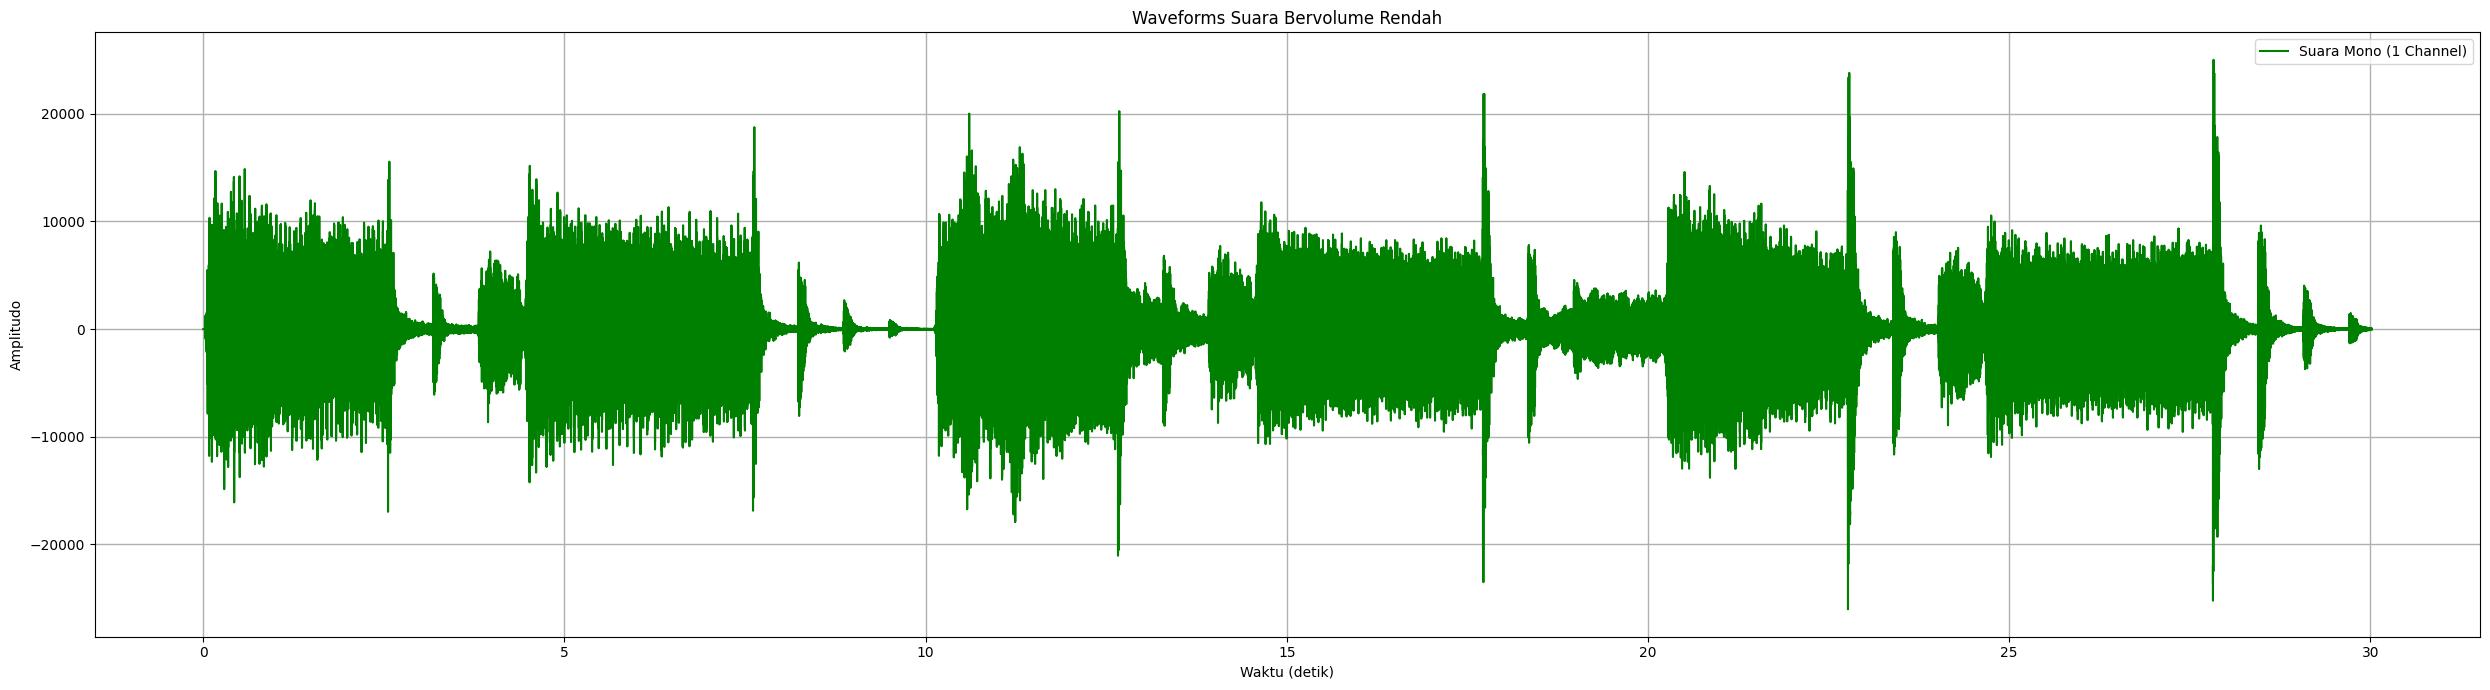

Puncak amplitudo terbesar berada di sampel ke-1227278 dengan nilai 25019
Lembah amplitudo terbesar berada di sampel ke-1004098 dengan nilai -26023


In [10]:
plt.figure(figsize=figure_size)

plt.plot(time_axis, audio_data, color='green', label='Suara Mono (1 Channel)')
plt.title('Waveforms Suara Bervolume Rendah')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (detik)')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

peaks, _ = find_peaks(audio_data, height=None)  

if peaks.size > 0:  
    peak_amplitude = audio_data[peaks]
    max_peak_idx = np.argmax(peak_amplitude) 
    max_peak_val = peak_amplitude[max_peak_idx]  
    max_peak_pos = peaks[max_peak_idx] 
    print(f'Puncak amplitudo terbesar berada di sampel ke-{max_peak_pos} dengan nilai {max_peak_val}')
else:
    print("Tidak ada puncak yang terdeteksi.")

inverted_data = -audio_data 
valleys, _ = find_peaks(inverted_data, height=None)

if valleys.size > 0:  
    valley_amplitude = audio_data[valleys]
    min_valley_idx = np.argmin(valley_amplitude)  
    min_valley_val = valley_amplitude[min_valley_idx] 
    min_valley_pos = valleys[min_valley_idx] 
    print(f'Lembah amplitudo terbesar berada di sampel ke-{min_valley_pos} dengan nilai {min_valley_val}')
else:
    print("Tidak ada lembah yang terdeteksi.")


#### Visualisasi Audio dengan Spectogram

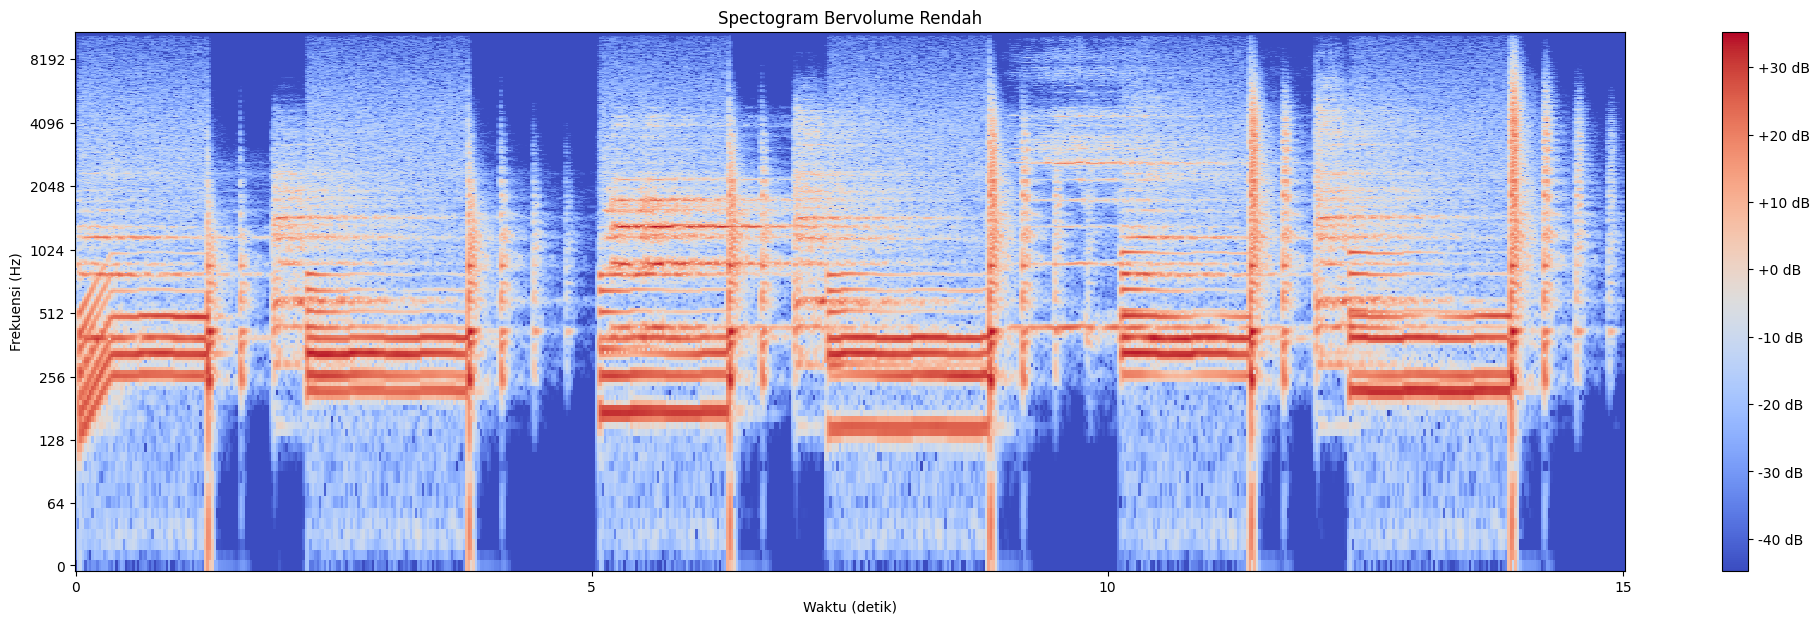

In [11]:
audio_samples = os.path.join(os.getcwd(), 'audio_samples', 'audio1.wav')

if not os.path.exists(audio_samples):
    print('File tidak ditemukan')
    exit()

array_amplitude, sampling_rate = librosa.load(audio_samples)

plt.figure(figsize=figure_size)

STFT = librosa.stft(array_amplitude)
STFT_data = librosa.amplitude_to_db(abs(STFT))

librosa.display.specshow(STFT_data, sr=sampling_rate, x_axis='time', y_axis='log')
plt.ylabel('Frekuensi (Hz)')
plt.xlabel('Waktu (detik)')
plt.colorbar(format=specto_format)
plt.title('Spectogram Bervolume Rendah')

# Menampilkan spektogram
plt.show()


### **Pengujian Audio dengan Volume Relatif Sedang**

#### Visualisasi Audio dengan Waveforms

In [13]:
audio_samples = os.path.join(os.getcwd(), 'data', 'audio2.wav')

if not os.path.exists(audio_sample):
 print('File tidak ditemukan')
 exit()

In [15]:
with wave.open(audio_sample, 'r') as wav_file:
 frames = wav_file.readframes(-1)
 audio_data = np.frombuffer(frames, dtype=data_type)
 audio_sampling_rate = wav_file.getframerate()
 n_channels = wav_file.getnchannels()
 sample_width = wav_file.getsampwidth()
 bit_depth = sample_width * 8

In [16]:
print(f"Isi data audio: {audio_data}")
print(f"Panjang data audio: {len(audio_data)}")
print(f"Sampling rate: {audio_sampling_rate}")
print(f"Jumlah channel: {n_channels}")
print(f"Audio bit-depth: {bit_depth}")

Isi data audio: [  0   0   0 ...  28 -30  32]
Panjang data audio: 1323742
Sampling rate: 44100
Jumlah channel: 2
Audio bit-depth: 16


In [17]:
audio_data = audio_data.reshape(-1, n_channels)
l_audio_data = audio_data[:, 0]
r_audio_data = audio_data[:, 1]
print(f"Panjang data audio kiri: {len(l_audio_data)}")
print(f"Panjang data audio kanan: {len(r_audio_data)}")

Panjang data audio kiri: 661871
Panjang data audio kanan: 661871


In [18]:
sample_len_audio = len(l_audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")


Panjang data audio: 661871
Durasi audio: 15.008412698412698 detik


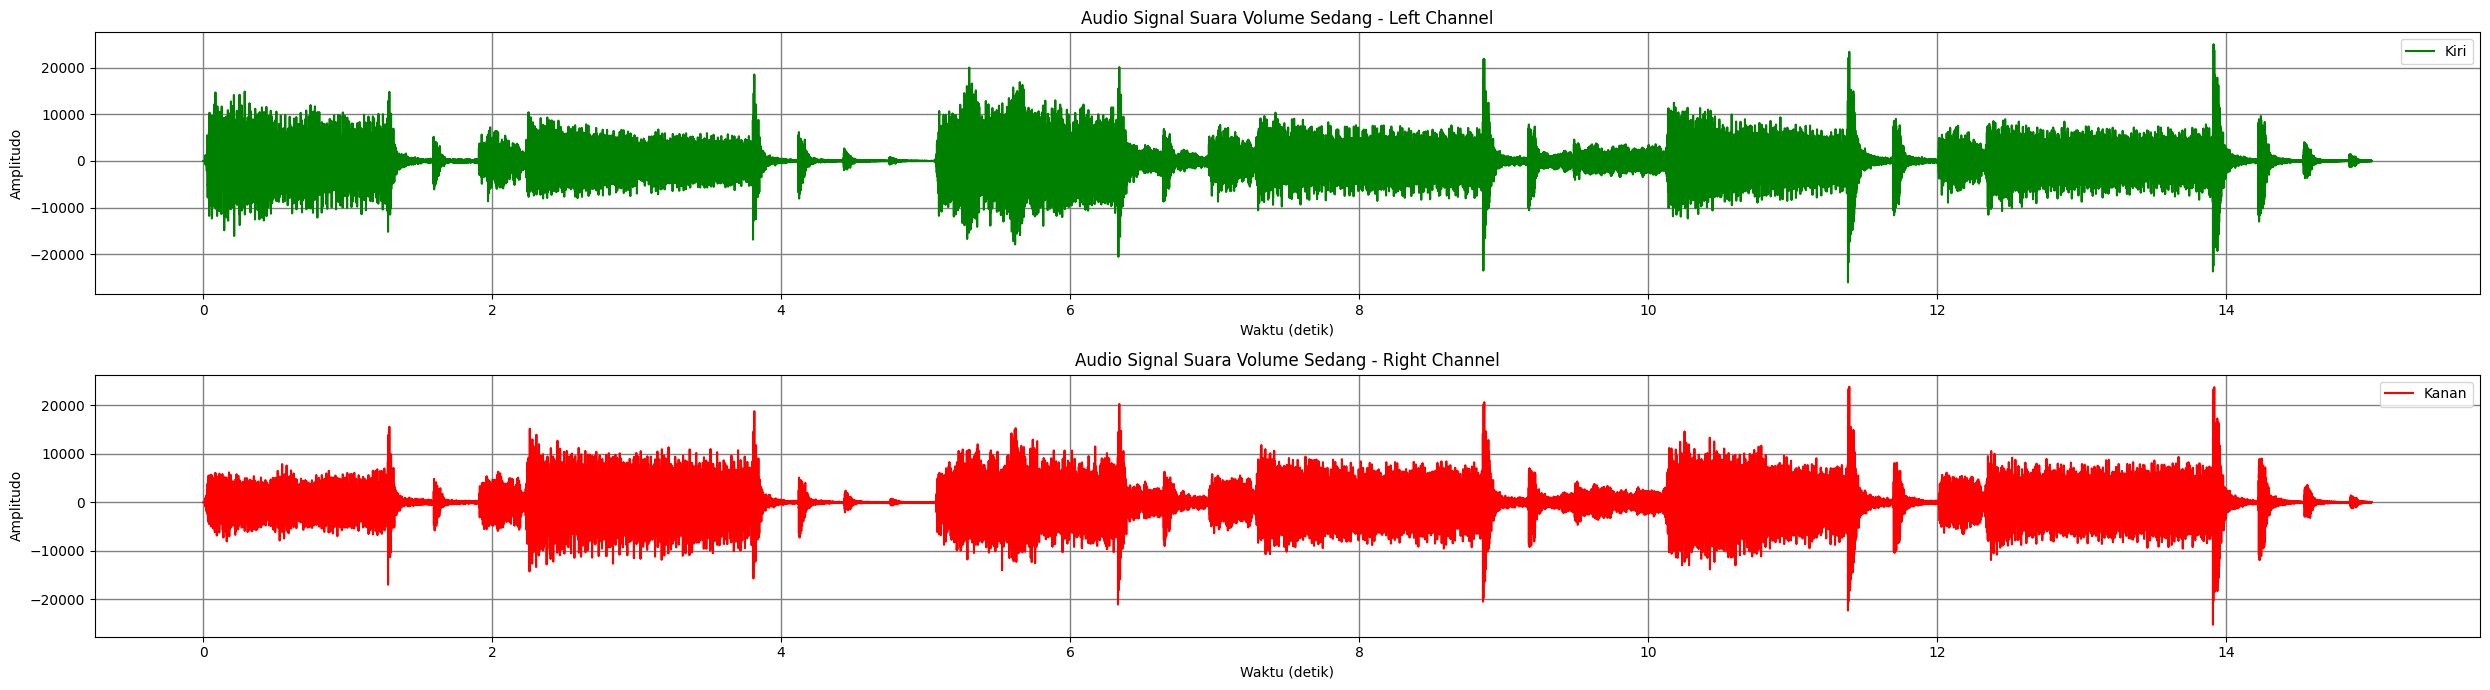

Puncak amplitudo terbesar berada di sampel ke-613639 dengan nilai amplitudo 25019
Lembah amplitudo terbesar berada di sampel ke-502049 dengan nilai amplitudo -26023


In [20]:
# Membuat 2 subplot untuk sinyal audio, 2 baris 1 kolom
fig, ax = plt.subplots(2, 1, figsize=figure_size)

# Plot untuk sinyal kiri (Left Channel)
ax[0].plot(time_axis, l_audio_data, color='green', label='Kiri')
ax[0].set_title('Audio Signal Suara Volume Sedang - Left Channel') 
ax[0].set_xlabel('Waktu (detik)')
ax[0].set_ylabel('Amplitudo')
ax[0].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[0].legend(loc='upper right')

# Plot untuk sinyal kanan (Right Channel)
ax[1].plot(time_axis, r_audio_data, color='red', label='Kanan')
ax[1].set_title('Audio Signal Suara Volume Sedang - Right Channel') 
ax[1].set_xlabel('Waktu (detik)')
ax[1].set_ylabel('Amplitudo')
ax[1].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[1].legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
# Menampilkan grafik
plt.show()

# Deteksi puncak amplitudo terbesar untuk Left Channel
peaks, _ = find_peaks(l_audio_data, height=None) 

if peaks.size > 0: # Memastikan ada puncak yang terdeteksi
    peak_amplitude = l_audio_data[peaks]
    max_peak_idx = np.argmax(peak_amplitude) # Mendapatkan indeks puncak terbesar
    max_peak_val = peak_amplitude[max_peak_idx] # Nilai amplitudo puncak terbesar
    max_peak_pos = peaks[max_peak_idx] # Posisi puncak terbesar
    print(f'Puncak amplitudo terbesar berada di sampel ke-{max_peak_pos} dengan nilai amplitudo {max_peak_val}')
else:
    print("Tidak ada puncak yang terdeteksi.")

# Deteksi lembah amplitudo terbesar (kebalikan dari puncak)
inverted_data = -l_audio_data # Membalikkan sinyal untuk mendeteksi lembah
valleys, _ = find_peaks(inverted_data, height=None)

if valleys.size > 0: # Memastikan ada lembah yang terdeteksi
    valley_amplitude = l_audio_data[valleys]
    min_valley_idx = np.argmin(valley_amplitude) # Mendapatkan indeks lembah terbesar
    min_valley_val = valley_amplitude[min_valley_idx] # Nilai amplitudo lembah terbesar
    min_valley_pos = valleys[min_valley_idx] # Posisi lembah terbesar
    print(f'Lembah amplitudo terbesar berada di sampel ke-{min_valley_pos} dengan nilai amplitudo {min_valley_val}')
else:
    print("Tidak ada lembah yang terdeteksi.")


#### Visualisasi Audio dengan Spectogram

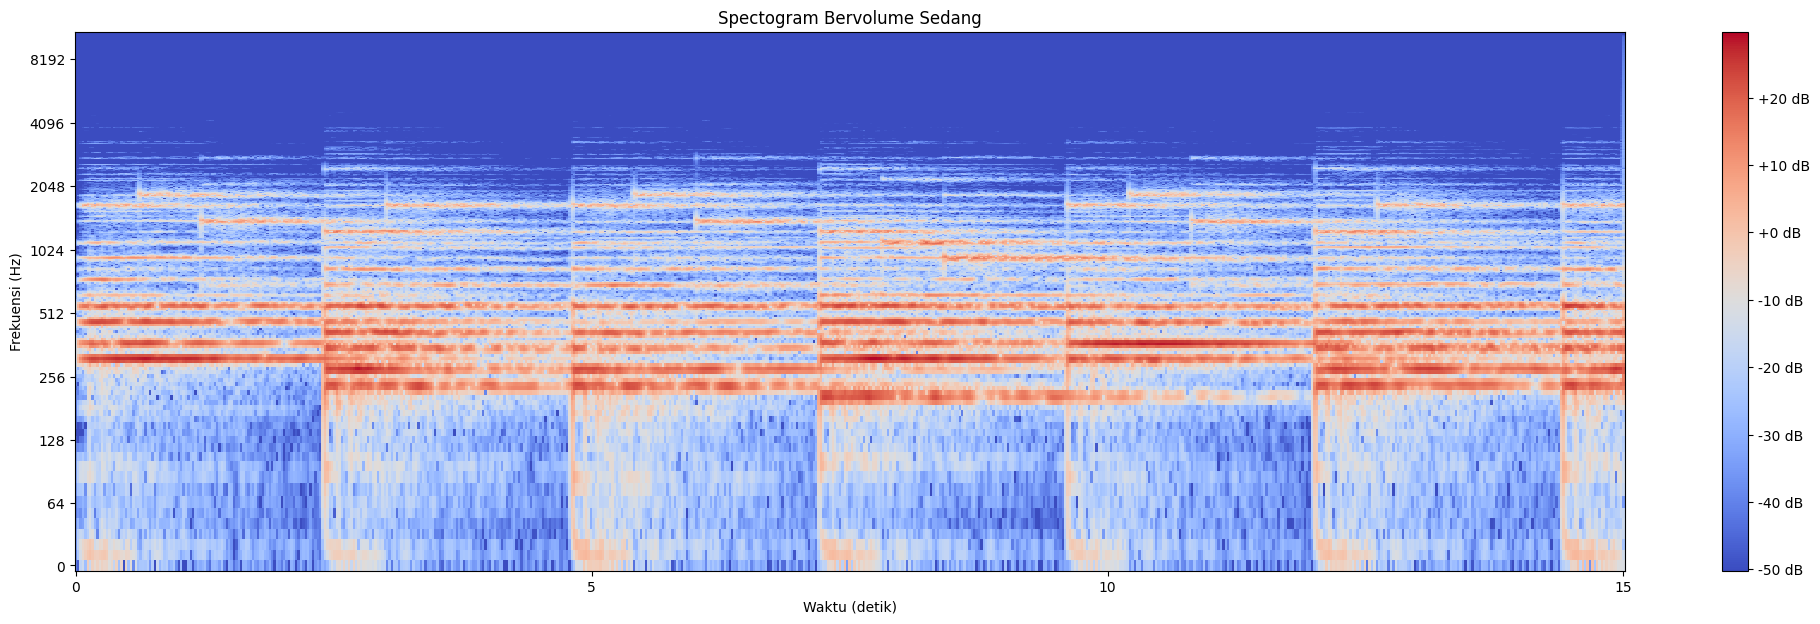

In [22]:
audio_path_file = os.path.join(os.getcwd(), 'audio_samples', 'audio2.wav')
# cek jika file tidak ada
if not os.path.exists(audio_path_file):
    print('File tidak ditemukan')
    exit()

# buka file sampel dan memprosesnya
array_amplitude, sampling_rate = librosa.load(audio_path_file)

# visualisasi dengan STFT
plt.figure(figsize=figure_size)
STFT = librosa.stft(array_amplitude)
STFT_data = librosa.amplitude_to_db(abs(STFT))

# visualisasi spektogram
librosa.display.specshow(STFT_data, sr=sampling_rate, x_axis='time', y_axis='log')
plt.ylabel('Frekuensi (Hz)')
plt.xlabel('Waktu (detik)')
plt.colorbar(format=specto_format)
plt.title('Spectogram Bervolume Sedang')
plt.show()


### **Pengujian Audio dengan Volume Relatif Tinggi**

#### Visualisasi Audio dengan Waveforms

In [24]:
audio_samples = os.path.join(os.getcwd(), 'data', 'audio3.wav')

if not os.path.exists(audio_sample):
 print('File tidak ditemukan')
 exit()

In [25]:
with wave.open(audio_sample, 'r') as wav_file:
 frames = wav_file.readframes(-1)
 audio_data = np.frombuffer(frames, dtype=data_type)
 audio_sampling_rate = wav_file.getframerate()
 n_channels = wav_file.getnchannels()
 sample_width = wav_file.getsampwidth()
 bit_depth = sample_width * 8

In [26]:
print(f"Isi data audio: {audio_data}")
print(f"Panjang data audio: {len(audio_data)}")
print(f"Sampling rate: {audio_sampling_rate}")
print(f"Jumlah channel: {n_channels}")
print(f"Audio bit-depth: {bit_depth}")

Isi data audio: [  0   0   0 ...  28 -30  32]
Panjang data audio: 1323742
Sampling rate: 44100
Jumlah channel: 2
Audio bit-depth: 16


In [27]:
audio_data = audio_data.reshape(-1, n_channels)
l_audio_data = audio_data[:, 0]
r_audio_data = audio_data[:, 1]
print(f"Panjang data audio kiri: {len(l_audio_data)}")
print(f"Panjang data audio kanan: {len(r_audio_data)}")

Panjang data audio kiri: 661871
Panjang data audio kanan: 661871


In [28]:
sample_len_audio = len(l_audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")


Panjang data audio: 661871
Durasi audio: 15.008412698412698 detik


#### Visualisasi Audio dengan Waveforms

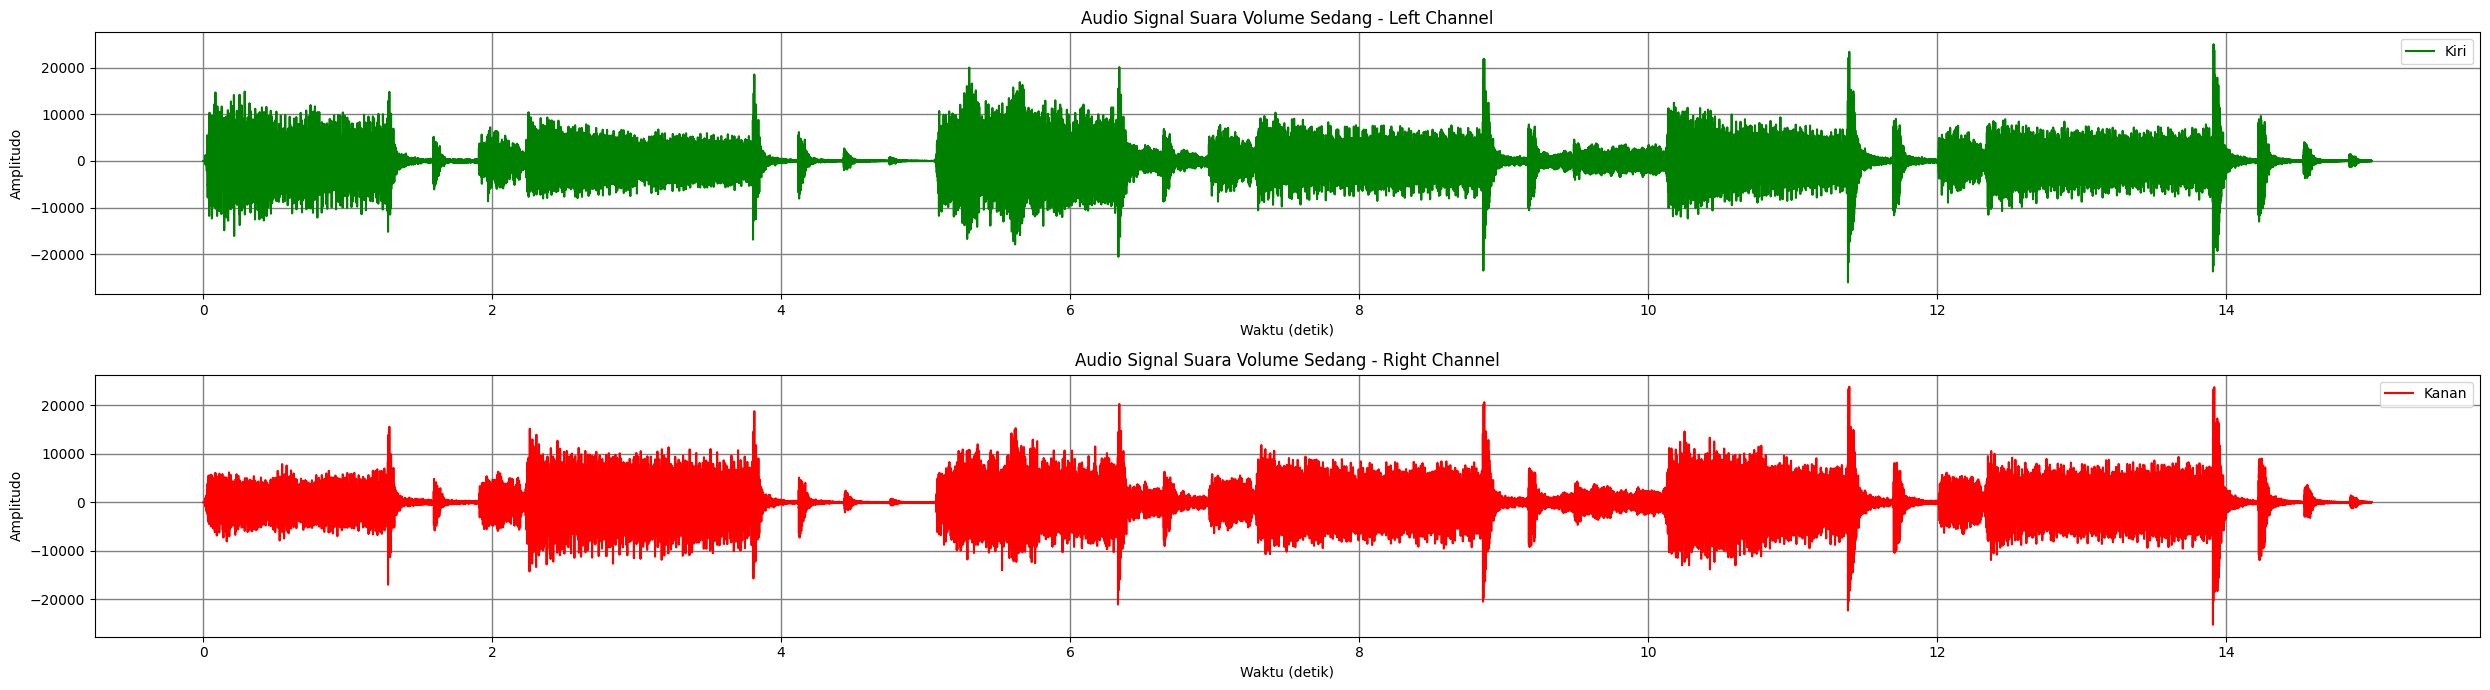

Puncak amplitudo terbesar berada di sampel ke-613639 dengan nilai amplitudo 25019
Lembah amplitudo terbesar berada di sampel ke-502049 dengan nilai amplitudo -26023


In [29]:
# Membuat 2 subplot untuk sinyal audio, 2 baris 1 kolom
fig, ax = plt.subplots(2, 1, figsize=figure_size)

# Plot untuk sinyal kiri (Left Channel)
ax[0].plot(time_axis, l_audio_data, color='green', label='Kiri')
ax[0].set_title('Audio Signal Suara Volume Sedang - Left Channel') 
ax[0].set_xlabel('Waktu (detik)')
ax[0].set_ylabel('Amplitudo')
ax[0].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[0].legend(loc='upper right')

# Plot untuk sinyal kanan (Right Channel)
ax[1].plot(time_axis, r_audio_data, color='red', label='Kanan')
ax[1].set_title('Audio Signal Suara Volume Sedang - Right Channel') 
ax[1].set_xlabel('Waktu (detik)')
ax[1].set_ylabel('Amplitudo')
ax[1].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[1].legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
# Menampilkan grafik
plt.show()

# Deteksi puncak amplitudo terbesar untuk Left Channel
peaks, _ = find_peaks(l_audio_data, height=None) 

if peaks.size > 0: # Memastikan ada puncak yang terdeteksi
    peak_amplitude = l_audio_data[peaks]
    max_peak_idx = np.argmax(peak_amplitude) # Mendapatkan indeks puncak terbesar
    max_peak_val = peak_amplitude[max_peak_idx] # Nilai amplitudo puncak terbesar
    max_peak_pos = peaks[max_peak_idx] # Posisi puncak terbesar
    print(f'Puncak amplitudo terbesar berada di sampel ke-{max_peak_pos} dengan nilai amplitudo {max_peak_val}')
else:
    print("Tidak ada puncak yang terdeteksi.")

# Deteksi lembah amplitudo terbesar (kebalikan dari puncak)
inverted_data = -l_audio_data # Membalikkan sinyal untuk mendeteksi lembah
valleys, _ = find_peaks(inverted_data, height=None)

if valleys.size > 0: # Memastikan ada lembah yang terdeteksi
    valley_amplitude = l_audio_data[valleys]
    min_valley_idx = np.argmin(valley_amplitude) # Mendapatkan indeks lembah terbesar
    min_valley_val = valley_amplitude[min_valley_idx] # Nilai amplitudo lembah terbesar
    min_valley_pos = valleys[min_valley_idx] # Posisi lembah terbesar
    print(f'Lembah amplitudo terbesar berada di sampel ke-{min_valley_pos} dengan nilai amplitudo {min_valley_val}')
else:
    print("Tidak ada lembah yang terdeteksi.")


#### Visualisasi Audio dengan Spectogram

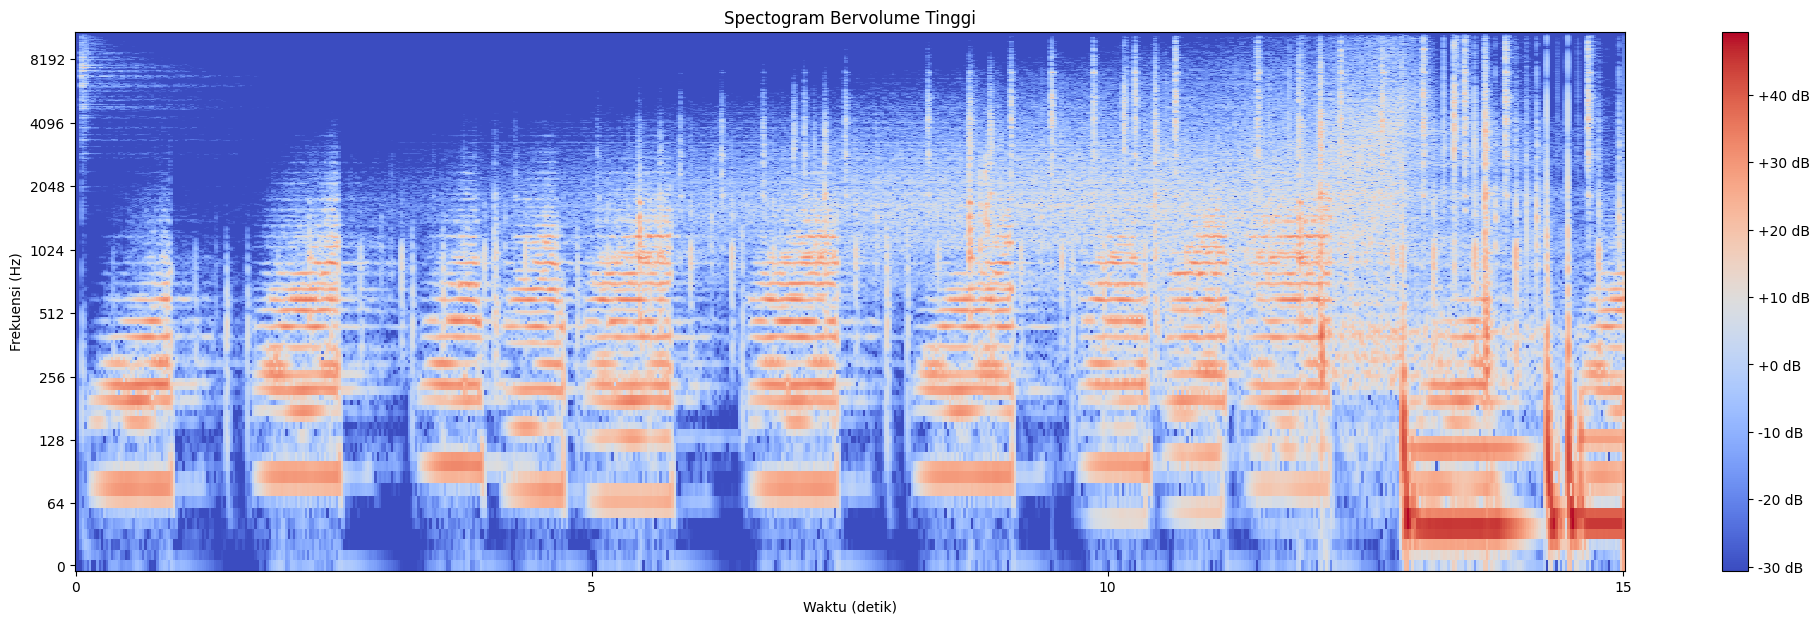

In [38]:
audio_path_file = os.path.join(os.getcwd(), 'audio_samples', 'audio3.wav')
# cek jika file tidak ada
if not os.path.exists(audio_path_file):
    print('File tidak ditemukan')
    exit()

# buka file sampel dan memprosesnya
array_amplitude, sampling_rate = librosa.load(audio_path_file)

# visualisasi dengan STFT
plt.figure(figsize=figure_size)
STFT = librosa.stft(array_amplitude)
STFT_data = librosa.amplitude_to_db(abs(STFT))

# visualisasi spektogram
librosa.display.specshow(STFT_data, sr=sampling_rate, x_axis='time', y_axis='log')
plt.ylabel('Frekuensi (Hz)')
plt.xlabel('Waktu (detik)')
plt.colorbar(format=specto_format)
plt.title('Spectogram Bervolume Tinggi')
plt.show()


### **Pengujian Audio dengan Suara "esss"**

In [32]:
audio_samples = os.path.join(os.getcwd(), 'data', 'audio5.wav')

if not os.path.exists(audio_sample):
 print('File tidak ditemukan')
 exit()

In [33]:
with wave.open(audio_sample, 'r') as wav_file:
 frames = wav_file.readframes(-1)
 audio_data = np.frombuffer(frames, dtype=data_type)
 audio_sampling_rate = wav_file.getframerate()
 n_channels = wav_file.getnchannels()
 sample_width = wav_file.getsampwidth()
 bit_depth = sample_width * 8

In [34]:
print(f"Isi data audio: {audio_data}")
print(f"Panjang data audio: {len(audio_data)}")
print(f"Sampling rate: {audio_sampling_rate}")
print(f"Jumlah channel: {n_channels}")
print(f"Audio bit-depth: {bit_depth}")

Isi data audio: [  0   0   0 ...  28 -30  32]
Panjang data audio: 1323742
Sampling rate: 44100
Jumlah channel: 2
Audio bit-depth: 16


In [35]:
audio_data = audio_data.reshape(-1, n_channels)
l_audio_data = audio_data[:, 0]
r_audio_data = audio_data[:, 1]
print(f"Panjang data audio kiri: {len(l_audio_data)}")
print(f"Panjang data audio kanan: {len(r_audio_data)}")

Panjang data audio kiri: 661871
Panjang data audio kanan: 661871


In [36]:
sample_len_audio = len(l_audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")


Panjang data audio: 661871
Durasi audio: 15.008412698412698 detik


### Visualisasi dengan Waveforms

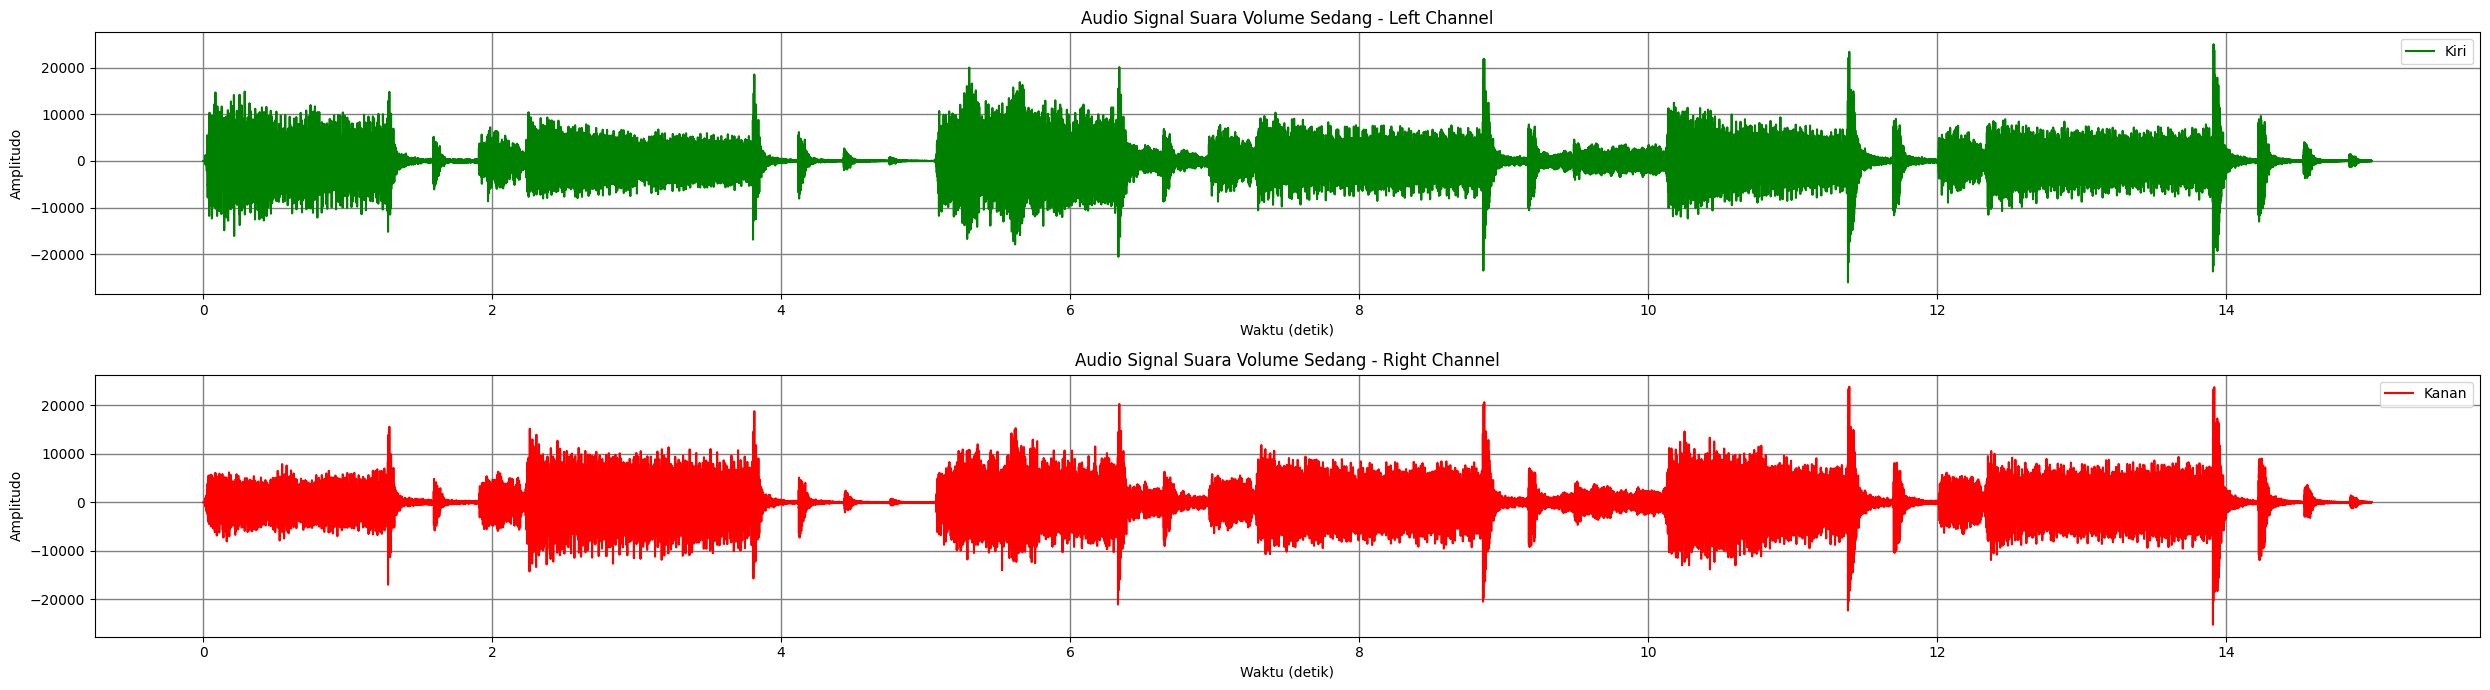

Puncak amplitudo terbesar berada di sampel ke-613639 dengan nilai amplitudo 25019
Lembah amplitudo terbesar berada di sampel ke-502049 dengan nilai amplitudo -26023


In [37]:
# Membuat 2 subplot untuk sinyal audio, 2 baris 1 kolom
fig, ax = plt.subplots(2, 1, figsize=figure_size)

# Plot untuk sinyal kiri (Left Channel)
ax[0].plot(time_axis, l_audio_data, color='green', label='Kiri')
ax[0].set_title('Audio Signal Suara Volume Sedang - Left Channel') 
ax[0].set_xlabel('Waktu (detik)')
ax[0].set_ylabel('Amplitudo')
ax[0].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[0].legend(loc='upper right')

# Plot untuk sinyal kanan (Right Channel)
ax[1].plot(time_axis, r_audio_data, color='red', label='Kanan')
ax[1].set_title('Audio Signal Suara Volume Sedang - Right Channel') 
ax[1].set_xlabel('Waktu (detik)')
ax[1].set_ylabel('Amplitudo')
ax[1].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[1].legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
# Menampilkan grafik
plt.show()

# Deteksi puncak amplitudo terbesar untuk Left Channel
peaks, _ = find_peaks(l_audio_data, height=None) 

if peaks.size > 0: # Memastikan ada puncak yang terdeteksi
    peak_amplitude = l_audio_data[peaks]
    max_peak_idx = np.argmax(peak_amplitude) # Mendapatkan indeks puncak terbesar
    max_peak_val = peak_amplitude[max_peak_idx] # Nilai amplitudo puncak terbesar
    max_peak_pos = peaks[max_peak_idx] # Posisi puncak terbesar
    print(f'Puncak amplitudo terbesar berada di sampel ke-{max_peak_pos} dengan nilai amplitudo {max_peak_val}')
else:
    print("Tidak ada puncak yang terdeteksi.")

# Deteksi lembah amplitudo terbesar (kebalikan dari puncak)
inverted_data = -l_audio_data # Membalikkan sinyal untuk mendeteksi lembah
valleys, _ = find_peaks(inverted_data, height=None)

if valleys.size > 0: # Memastikan ada lembah yang terdeteksi
    valley_amplitude = l_audio_data[valleys]
    min_valley_idx = np.argmin(valley_amplitude) # Mendapatkan indeks lembah terbesar
    min_valley_val = valley_amplitude[min_valley_idx] # Nilai amplitudo lembah terbesar
    min_valley_pos = valleys[min_valley_idx] # Posisi lembah terbesar
    print(f'Lembah amplitudo terbesar berada di sampel ke-{min_valley_pos} dengan nilai amplitudo {min_valley_val}')
else:
    print("Tidak ada lembah yang terdeteksi.")


### Visualisasi Audio dengan Spectogram

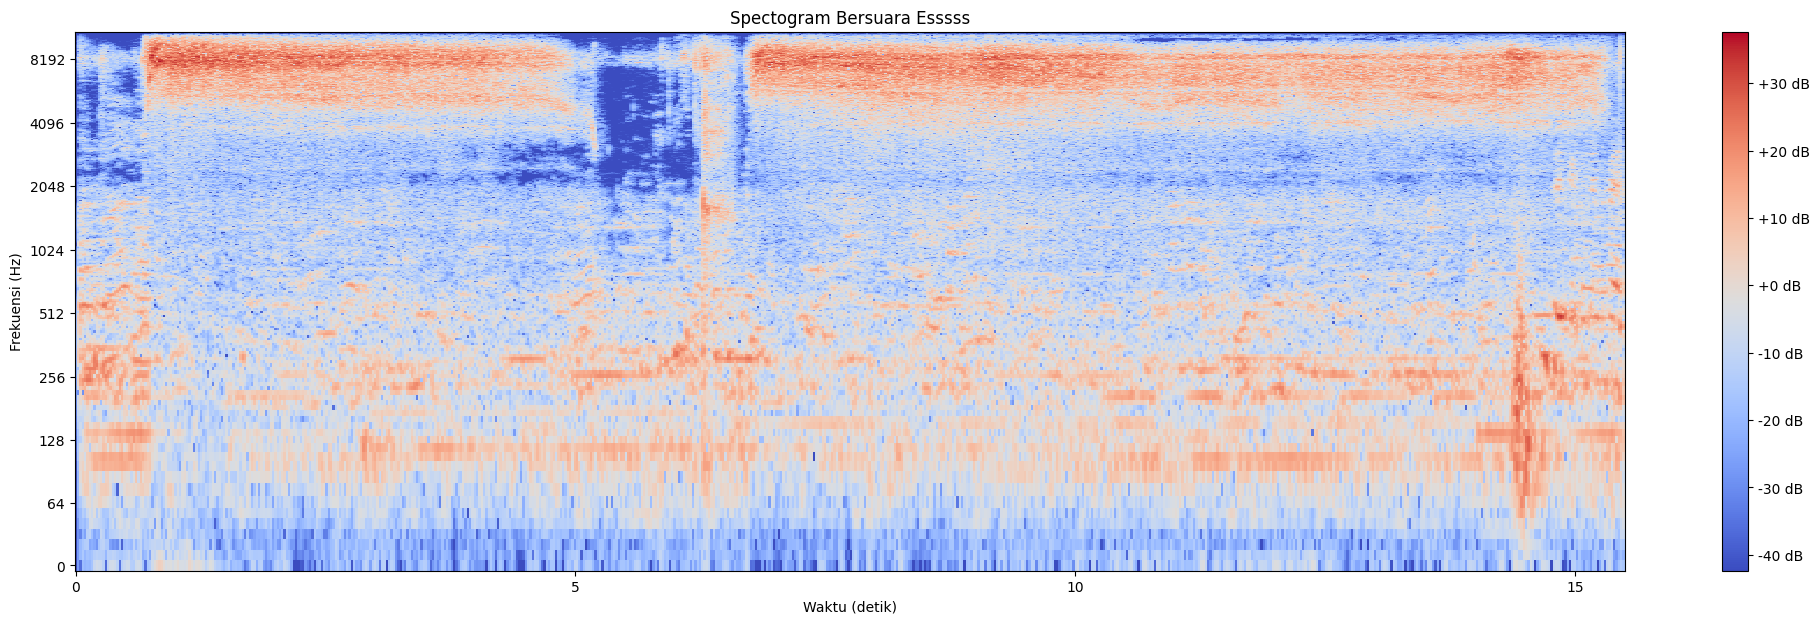

In [40]:
audio_path_file = os.path.join(os.getcwd(), 'audio_samples', 'audio5.wav')
# cek jika file tidak ada
if not os.path.exists(audio_path_file):
    print('File tidak ditemukan')
    exit()

# buka file sampel dan memprosesnya
array_amplitude, sampling_rate = librosa.load(audio_path_file)

# visualisasi dengan STFT
plt.figure(figsize=figure_size)
STFT = librosa.stft(array_amplitude)
STFT_data = librosa.amplitude_to_db(abs(STFT))

# visualisasi spektogram
librosa.display.specshow(STFT_data, sr=sampling_rate, x_axis='time', y_axis='log')
plt.ylabel('Frekuensi (Hz)')
plt.xlabel('Waktu (detik)')
plt.colorbar(format=specto_format)
plt.title('Spectogram Bersuara Esssss')
plt.show()


### **Pengujian Audio dengan Suara "Errrr"**

In [41]:
audio_samples = os.path.join(os.getcwd(), 'data', 'audio4.wav')

if not os.path.exists(audio_sample):
 print('File tidak ditemukan')
 exit()

In [42]:
with wave.open(audio_sample, 'r') as wav_file:
 frames = wav_file.readframes(-1)
 audio_data = np.frombuffer(frames, dtype=data_type)
 audio_sampling_rate = wav_file.getframerate()
 n_channels = wav_file.getnchannels()
 sample_width = wav_file.getsampwidth()
 bit_depth = sample_width * 8

In [43]:
print(f"Isi data audio: {audio_data}")
print(f"Panjang data audio: {len(audio_data)}")
print(f"Sampling rate: {audio_sampling_rate}")
print(f"Jumlah channel: {n_channels}")
print(f"Audio bit-depth: {bit_depth}")

Isi data audio: [  0   0   0 ...  28 -30  32]
Panjang data audio: 1323742
Sampling rate: 44100
Jumlah channel: 2
Audio bit-depth: 16


In [44]:
audio_data = audio_data.reshape(-1, n_channels)
l_audio_data = audio_data[:, 0]
r_audio_data = audio_data[:, 1]
print(f"Panjang data audio kiri: {len(l_audio_data)}")
print(f"Panjang data audio kanan: {len(r_audio_data)}")

Panjang data audio kiri: 661871
Panjang data audio kanan: 661871


In [45]:
sample_len_audio = len(l_audio_data)
audio_len_sec = sample_len_audio / audio_sampling_rate
time_axis = np.linspace(0, audio_len_sec, sample_len_audio)
print(f"Panjang data audio: {sample_len_audio}")
print(f"Durasi audio: {audio_len_sec} detik")


Panjang data audio: 661871
Durasi audio: 15.008412698412698 detik


#### Visualisasi Audio dengan Waveforms

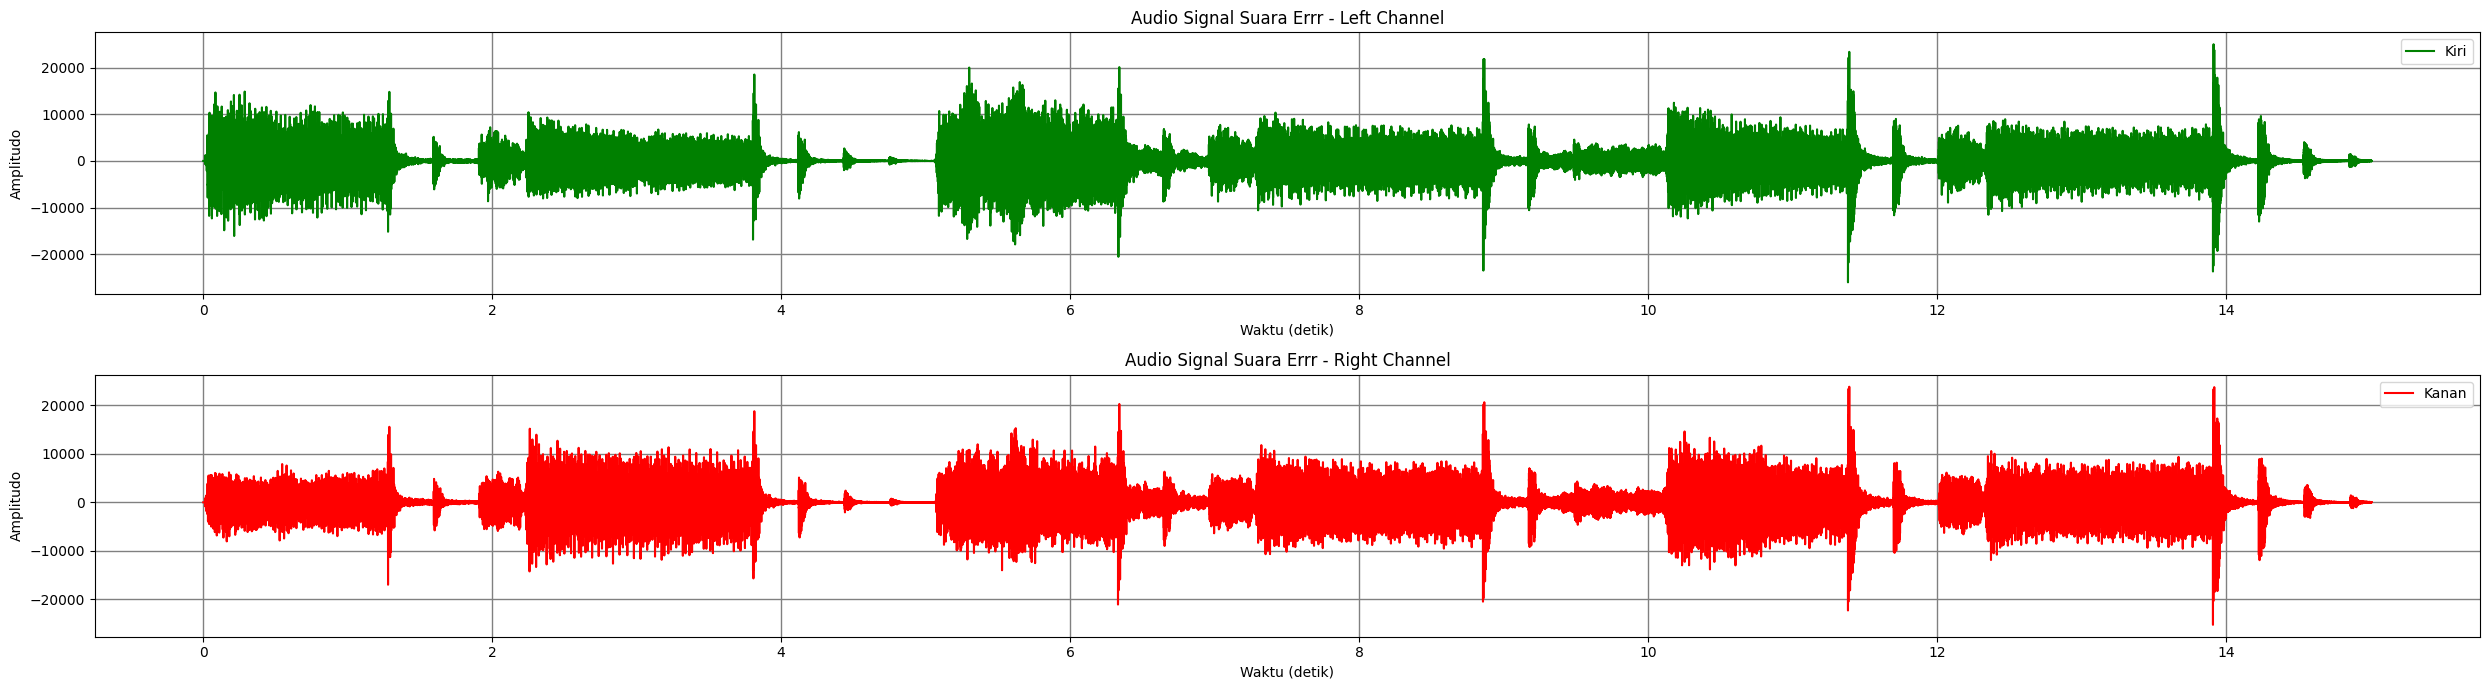

Puncak amplitudo terbesar berada di sampel ke-613639 dengan nilai amplitudo 25019
Lembah amplitudo terbesar berada di sampel ke-502049 dengan nilai amplitudo -26023


In [46]:
# Membuat 2 subplot untuk sinyal audio, 2 baris 1 kolom
fig, ax = plt.subplots(2, 1, figsize=figure_size)

# Plot untuk sinyal kiri (Left Channel)
ax[0].plot(time_axis, l_audio_data, color='green', label='Kiri')
ax[0].set_title('Audio Signal Suara Errr - Left Channel') 
ax[0].set_xlabel('Waktu (detik)')
ax[0].set_ylabel('Amplitudo')
ax[0].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[0].legend(loc='upper right')

# Plot untuk sinyal kanan (Right Channel)
ax[1].plot(time_axis, r_audio_data, color='red', label='Kanan')
ax[1].set_title('Audio Signal Suara Errr - Right Channel') 
ax[1].set_xlabel('Waktu (detik)')
ax[1].set_ylabel('Amplitudo')
ax[1].grid(linewidth=fig_linewidth, linestyle=fig_linestyle, color='gray')
ax[1].legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
# Menampilkan grafik
plt.show()

# Deteksi puncak amplitudo terbesar untuk Left Channel
peaks, _ = find_peaks(l_audio_data, height=None) 

if peaks.size > 0: # Memastikan ada puncak yang terdeteksi
    peak_amplitude = l_audio_data[peaks]
    max_peak_idx = np.argmax(peak_amplitude) # Mendapatkan indeks puncak terbesar
    max_peak_val = peak_amplitude[max_peak_idx] # Nilai amplitudo puncak terbesar
    max_peak_pos = peaks[max_peak_idx] # Posisi puncak terbesar
    print(f'Puncak amplitudo terbesar berada di sampel ke-{max_peak_pos} dengan nilai amplitudo {max_peak_val}')
else:
    print("Tidak ada puncak yang terdeteksi.")

# Deteksi lembah amplitudo terbesar (kebalikan dari puncak)
inverted_data = -l_audio_data # Membalikkan sinyal untuk mendeteksi lembah
valleys, _ = find_peaks(inverted_data, height=None)

if valleys.size > 0: # Memastikan ada lembah yang terdeteksi
    valley_amplitude = l_audio_data[valleys]
    min_valley_idx = np.argmin(valley_amplitude) # Mendapatkan indeks lembah terbesar
    min_valley_val = valley_amplitude[min_valley_idx] # Nilai amplitudo lembah terbesar
    min_valley_pos = valleys[min_valley_idx] # Posisi lembah terbesar
    print(f'Lembah amplitudo terbesar berada di sampel ke-{min_valley_pos} dengan nilai amplitudo {min_valley_val}')
else:
    print("Tidak ada lembah yang terdeteksi.")


#### Visualisasi Audio dengan Spectogram

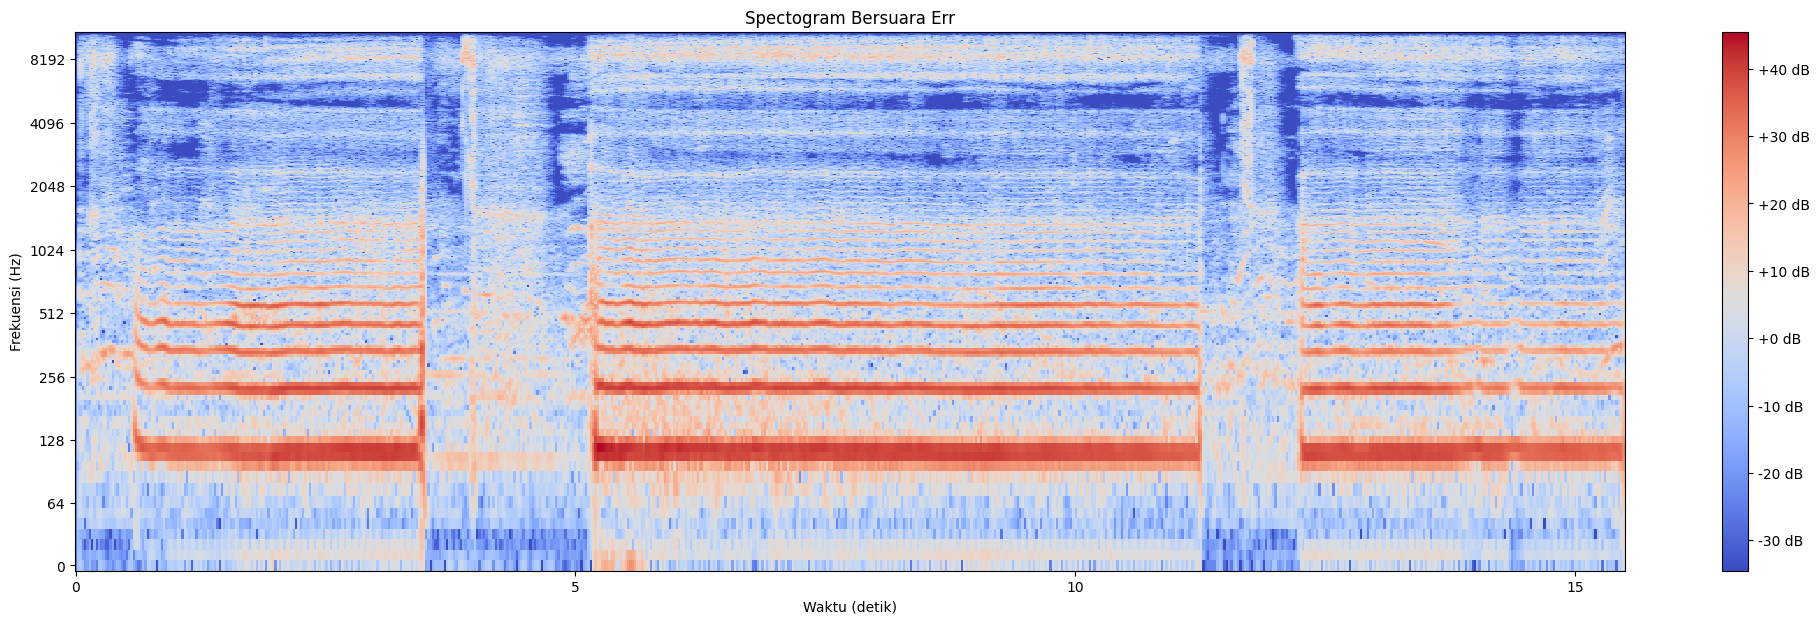

In [48]:
audio_path_file = os.path.join(os.getcwd(), 'audio_samples', 'audio4.wav')
# cek jika file tidak ada
if not os.path.exists(audio_path_file):
    print('File tidak ditemukan')
    exit()

# buka file sampel dan memprosesnya
array_amplitude, sampling_rate = librosa.load(audio_path_file)

# visualisasi dengan STFT
plt.figure(figsize=figure_size)
STFT = librosa.stft(array_amplitude)
STFT_data = librosa.amplitude_to_db(abs(STFT))

# visualisasi spektogram
librosa.display.specshow(STFT_data, sr=sampling_rate, x_axis='time', y_axis='log')
plt.ylabel('Frekuensi (Hz)')
plt.xlabel('Waktu (detik)')
plt.colorbar(format=specto_format)
plt.title('Spectogram Bersuara Err')
plt.show()


## Soal 2: 
### Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda:


#### Link ChatGPT: https://chatgpt.com/share/66fffe82-863c-8006-8288-c23e91783ce4

In [49]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
def logarithmic_fade(data, fade_in=True, alpha=5):
    """
    Menerapkan logarithmic fading pada audio data.
    
    Parameters:
    data (numpy array): Data audio.
    fade_in (bool): True untuk fade-in, False untuk fade-out.
    alpha (float): Kontrol kecepatan fade.
    
    Returns:
    numpy array: Audio data setelah diterapkan fading.
    """
    # Mendapatkan panjang data audio
    length = len(data)
    
    # Membuat waktu t antara 0 dan 1
    t = np.linspace(0, 1, length)
    
    # Fungsi fading logarithmic
    fade_curve = np.log1p(alpha * t)
    
    # Normalisasi kurva fading (membuat nilai maksimum 1)
    fade_curve = fade_curve / fade_curve.max()
    
    # Jika fade-out, kurva fading dibalik
    if not fade_in:
        fade_curve = fade_curve[::-1]
    
    # Menerapkan fading pada audio data
    faded_data = data * fade_curve[:, np.newaxis]
    
    return faded_data

In [55]:
file_path = r'audio_samples\audio1.wav'
sample_rate, data = wavfile.read(file_path)

print(f"Sample rate: {sample_rate}")
print(f"Data shape: {data.shape}")

if data.dtype == np.int16:
    data = data / 32768.0

Sample rate: 44100
Data shape: (661871, 2)


In [56]:
faded_in_audio = logarithmic_fade(data, fade_in=True, alpha=5)

In [57]:
faded_out_audio = logarithmic_fade(data, fade_in=False, alpha=5)

In [58]:
wavfile.write('output_fade_in.wav', sample_rate, faded_in_audio.astype(np.float32))
wavfile.write('output_fade_out.wav', sample_rate, faded_out_audio.astype(np.float32))

C:\Users\bintx\OneDrive\Documents\ITERA\Teknologi Multimedia (IF4021)\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


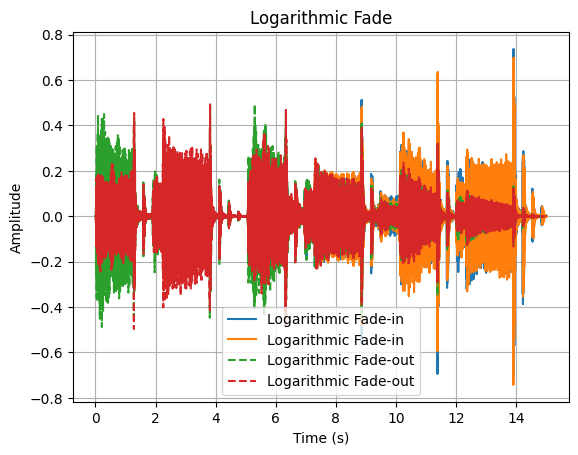

In [59]:
t = np.linspace(0, len(data) / sample_rate, num=len(data))
plt.plot(t, faded_in_audio, label="Logarithmic Fade-in")
plt.plot(t, faded_out_audio, label="Logarithmic Fade-out", linestyle='--')
plt.title('Logarithmic Fade')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Soal 3: 
### Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS.



In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave

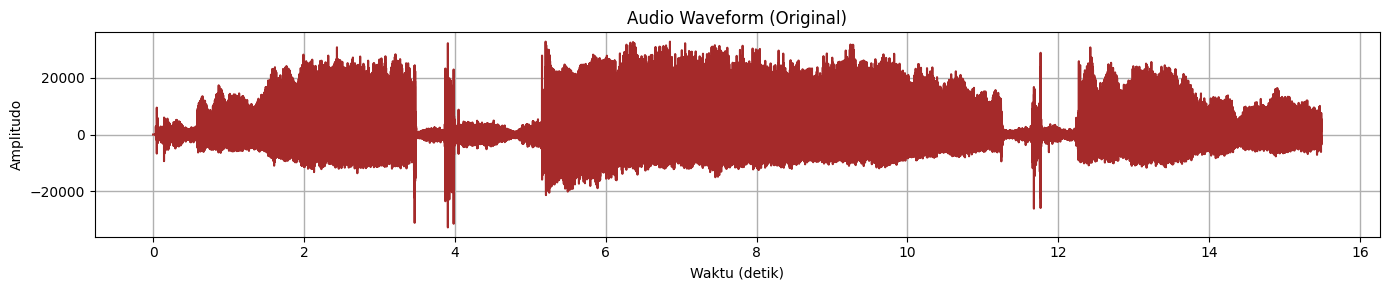

In [7]:
data_type = np.int16
audio_path_file = os.path.join(os.getcwd(), 'audio_samples', 'audio4.wav')

if not os.path.exists(audio_path_file):
 print('File tidak ditemukan')
 exit()

with wave.open(audio_path_file, 'r') as wav_file:
 n_frames = wav_file.getnframes()
 n_channels = wav_file.getnchannels()
 audio_sampling_rate = wav_file.getframerate()
 sample_width = wav_file.getsampwidth()
 audio_data = np.frombuffer(wav_file.readframes(n_frames), dtype=data_type)

if n_channels > 1:
 audio_data = audio_data.reshape(-1, n_channels)
time_axis_second = np.linspace(0, n_frames/audio_sampling_rate, n_frames)
plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data, color="brown")
plt.title('Audio Waveform (Original)')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (detik)')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()


#### Pengecekkan LUFS Original Audio

In [8]:
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])


#### Mencari Nilai Max

In [9]:
max_value_audio = np.max(np.abs(audio_data))
print(f'Maksimum nilai amplitudo audio: {max_value_audio}')

Maksimum nilai amplitudo audio: 32767


In [10]:
float_data_audio = audio_data.astype(np.float32) / 32767.0

In [12]:
# Inisialisasi array untuk audio yang difilter
audio_filtered = np.zeros_like(float_data_audio)

# Looping melalui data audio untuk memproses filter
for i in range(len(float_data_audio)):
    if i < 2:
        # Jika indeks kurang dari 2, tidak menerapkan filter
        audio_filtered[i] = float_data_audio[i]
    else:
        # Menerapkan filter dengan koefisien 'a' dan 'b'
        audio_filtered[i] = (b[0] * float_data_audio[i] +
                             b[1] * float_data_audio[i-1] +
                             b[2] * float_data_audio[i-2] -
                             a[1] * audio_filtered[i-1] -
                             a[2] * audio_filtered[i-2])

In [13]:
mean_square_audio = np.mean(np.square(float_data_audio))
print(f'Mean Square Audio Asli: {mean_square_audio:.5f}')

Mean Square Audio Asli: 0.03317


#### Menghitung LUFS

In [14]:
lufs_formula = -0.691 + 10 * np.log10(mean_square_audio)
print(f'LUFS Audio Asli: {lufs_formula:.5f}')

LUFS Audio Asli: -15.48385


##### Sedikit lagi mencapai -14 LUFS

#### Mulai Kompresi Audio

In [17]:
max_value_audio = np.max(np.abs(audio_data))
audio_threshold = 0.4 * max_value_audio
print(f"Nilai maksimum audio: {max_value_audio:.3f}")
print(f"Threshold audio: {audio_threshold:.3f}")
compressed_audio_data = audio_data.copy()


Nilai maksimum audio: 32767.000
Threshold audio: 13106.800


In [18]:
compressed_audio_mask = np.abs(compressed_audio_data) > audio_threshold
print(f"Mask audio terkompresi: {compressed_audio_mask}")
print(f"Jumlah data audio yang terkompresi: {np.sum(compressed_audio_mask)}")


Mask audio terkompresi: [False False False ... False False False]
Jumlah data audio yang terkompresi: 36518


In [21]:
ratio_scale = 6

compressed_audio_data[compressed_audio_mask] = audio_threshold + (np.abs(compressed_audio_data[compressed_audio_mask]) * ratio_scale)

compressed_audio_data = np.clip(compressed_audio_data, -max_value_audio, max_value_audio)


C:\Users\bintx\AppData\Local\Temp\ipykernel_20552\2124826322.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\bintx\OneDrive\Documents\ITERA\Teknologi Multimedia (IF4021)\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


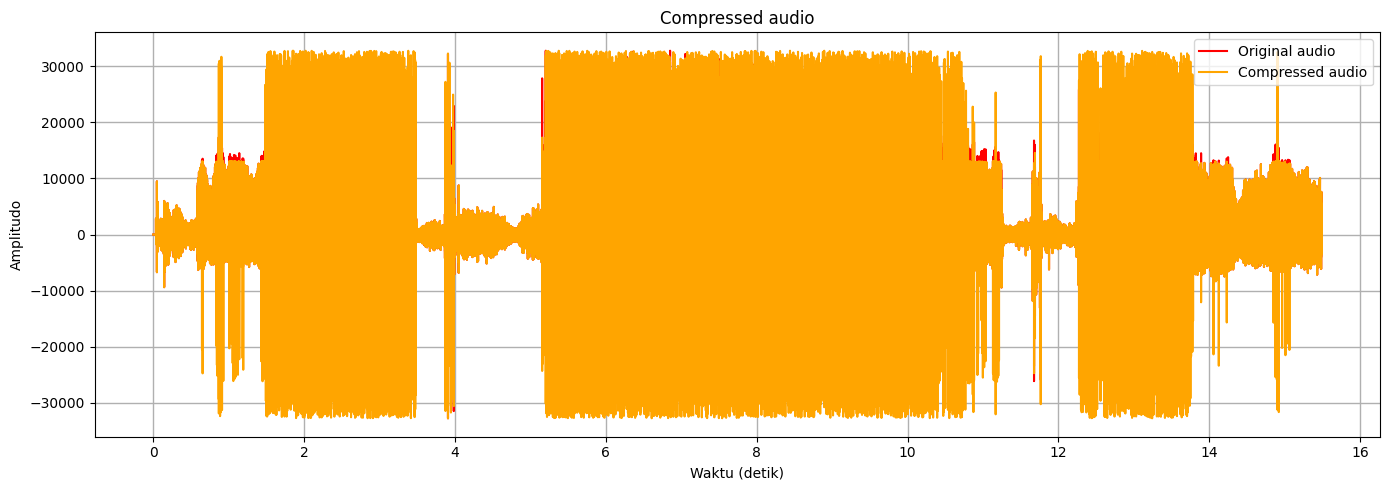

In [22]:
time_axis_second = np.linspace(0, n_frames / audio_sampling_rate, n_frames)
plt.figure(figsize=(14, 5))
plt.plot(time_axis_second, audio_data, color='red', label='Original audio')
plt.plot(time_axis_second, compressed_audio_data, color='orange', label='Compressed audio')  # Menambahkan label yang lengkap
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Compressed audio')
plt.legend()
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()


#### Normalisasi Audio

In [24]:
max_value_audio = np.max(np.abs(compressed_audio_data))
compressed_normalized_audio = compressed_audio_data / max_value_audio * 32767
compressed_normalized_audio = compressed_normalized_audio.astype(np.int16)


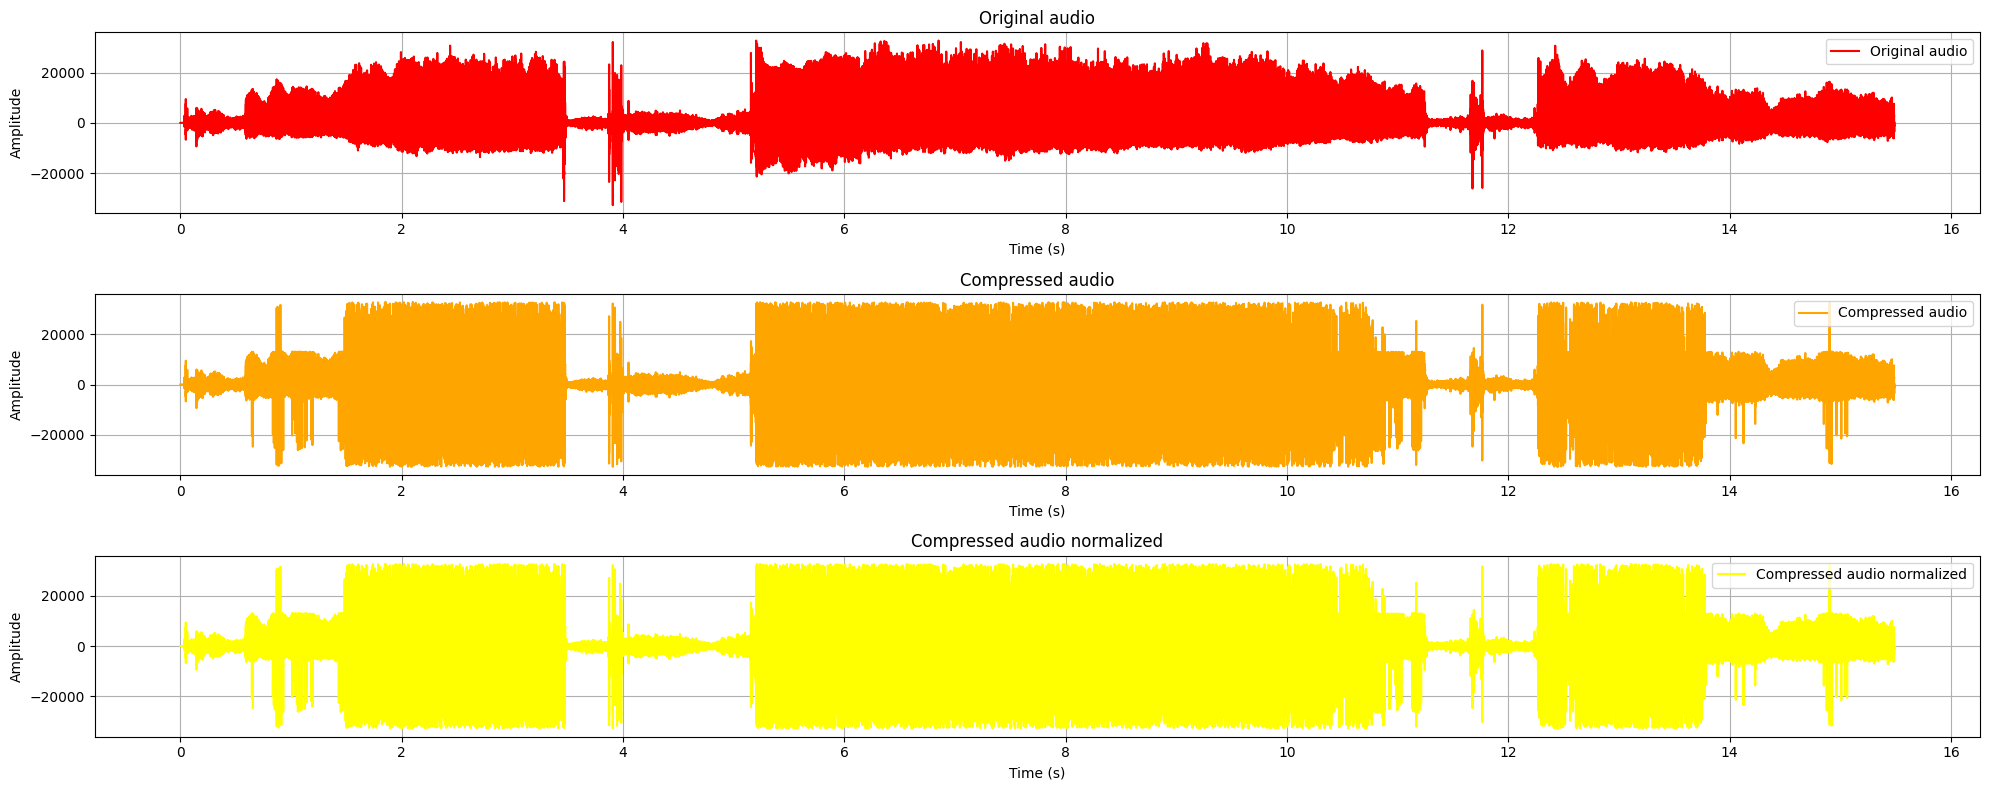

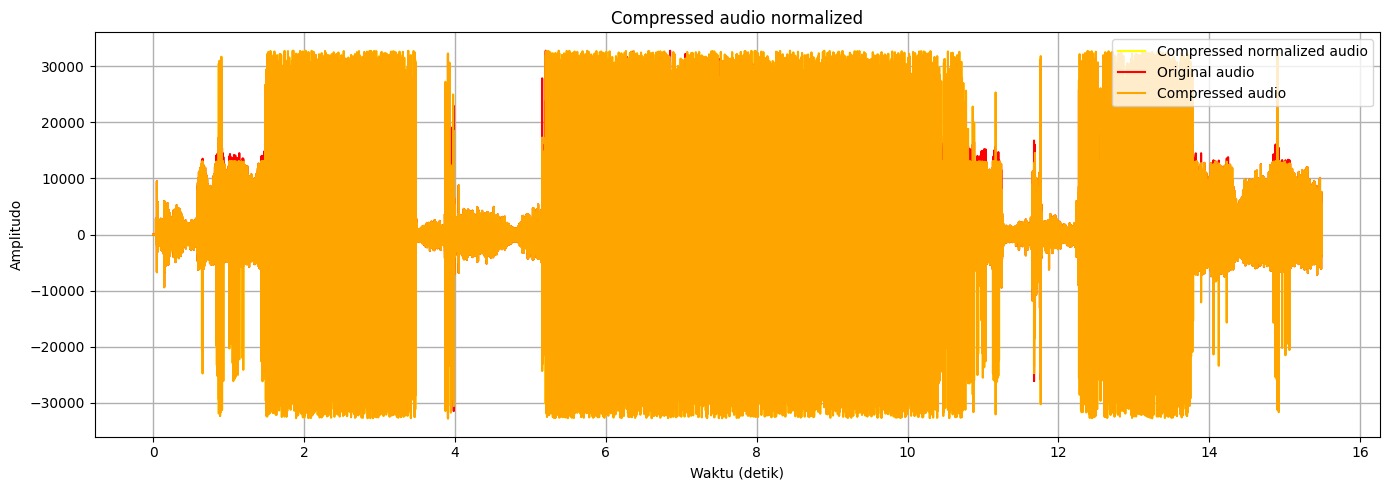

In [29]:
time_axis_second = np.linspace(0, n_frames / audio_sampling_rate, n_frames)

# Membuat subplot
fig, ax = plt.subplots(3, 1, figsize=(20, 8))

# Plot Original audio
ax[0].plot(time_axis_second, audio_data, color='red', label='Original audio')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original audio')
ax[0].grid(True)

# Plot Compressed audio
ax[1].plot(time_axis_second, compressed_audio_data, color='orange', label='Compressed audio')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Compressed audio')
ax[1].grid(True)

# Plot Compressed audio normalized
ax[2].plot(time_axis_second, compressed_normalized_audio, color='yellow', label='Compressed audio normalized')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Compressed audio normalized')
ax[2].grid(True)

# Menambahkan legend
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

# Menampilkan layout yang rapi
plt.tight_layout()
plt.show()

# Plot tambahan untuk normalized audio
plt.figure(figsize=(14, 5))
plt.plot(time_axis_second, compressed_normalized_audio, color='yellow', label='Compressed normalized audio')
plt.plot(time_axis_second, audio_data, color='red', label='Original audio')
plt.plot(time_axis_second, compressed_audio_data, color='orange', label='Compressed audio')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Compressed audio normalized')
plt.legend(loc='upper right')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()


In [28]:
# Menghitung nilai maksimum dari audio terkompresi
max_value_audio = np.max(np.abs(compressed_normalized_audio))
print(f'Maksimum nilai amplitudo audio: {max_value_audio}')

# Mengubah data audio ke tipe float32 dan normalisasi
float_data_audio = compressed_normalized_audio.astype(np.float32) / 32767.0

# Inisialisasi array untuk audio terfilter
audio_filtered = np.zeros_like(float_data_audio)

# Filter audio menggunakan koefisien filter
for i in range(len(float_data_audio)):
    if i < 2:
        audio_filtered[i] = float_data_audio[i]
    else:
        audio_filtered[i] = (b[0] * float_data_audio[i] + 
                             b[1] * float_data_audio[i - 1] - 
                             a[1] * audio_filtered[i - 1] - 
                             a[2] * audio_filtered[i - 2])

# Hitung Mean Square Audio
mean_square_audio = np.mean(np.square(float_data_audio))
print(f'Mean Square Audio Sekarang: {mean_square_audio:.5f}')

# Menghitung LUFS
lufs_formula = -0.691 + 10 * np.log10(mean_square_audio)
print(f'LUFS Audio Sekarang: {lufs_formula:.5f}')


Maksimum nilai amplitudo audio: 32767
Mean Square Audio Sekarang: 0.03284
LUFS Audio Sekarang: -15.52719


##### Masih di angka -15 sudah mendekati -14

## Soal 4: 
### Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam. Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).



Number of channels: 1
Sample width: 2
Sampling rate: 44100
Number of samples: 954368


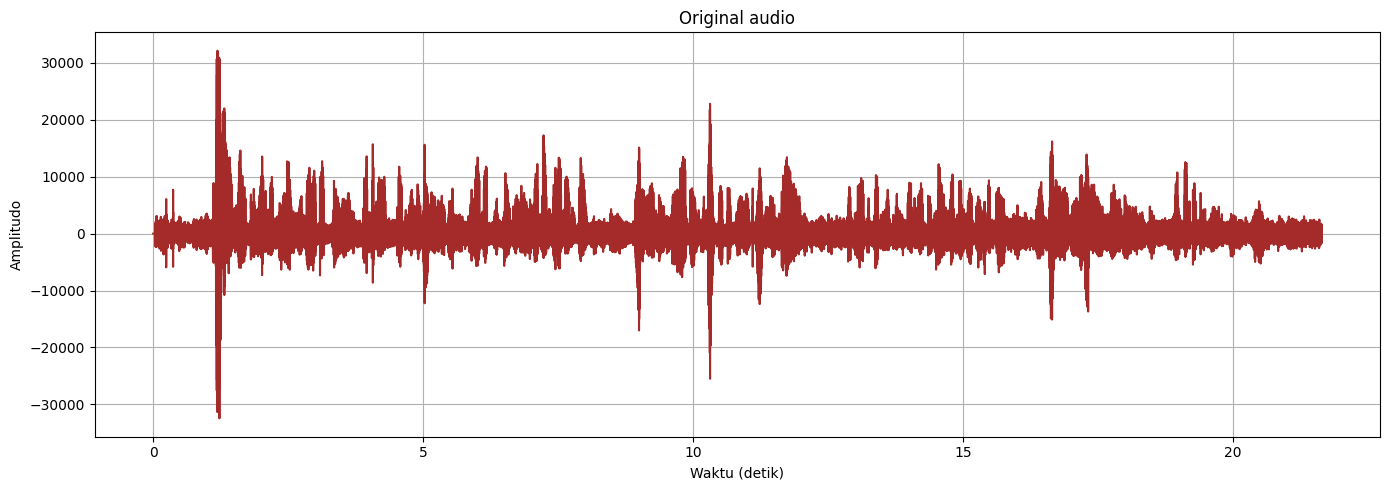

In [32]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

# Path ke file audio
audio_file_path = os.path.join(os.getcwd(), 'audio_samples', 'audio6.wav')

# Cek apakah file ada
if not os.path.exists(audio_file_path):
    print('File not found:', audio_file_path)
else:
    # Buka file audio dan ambil informasi
    with wave.open(audio_file_path, 'r') as wav_file:
        num_of_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        sampling_rate = wav_file.getframerate()
        num_of_samples = wav_file.getnframes()
        audio_content = wav_file.readframes(num_of_samples)
        audio_data = np.frombuffer(audio_content, dtype=np.int16)

    # Tampilkan informasi audio
    print('Number of channels:', num_of_channels)
    print('Sample width:', sample_width)
    print('Sampling rate:', sampling_rate)
    print('Number of samples:', num_of_samples)

    # Buat sumbu waktu
    time_axis_second = np.linspace(0, num_of_samples / sampling_rate, num_of_samples)

    # Visualisasi audio
    plt.figure(figsize=(14, 5))
    plt.plot(time_axis_second, audio_data, color='brown')
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')
    plt.title('Original audio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Visualisasi Spektrum Asli

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def frequency_spectrum(audio_data, sampling_rate, title):
    fft_data = np.fft.fft(audio_data)
    frequencies = np.fft.fftfreq(len(fft_data), 1 / sampling_rate)
    
    # Memilih frekuensi positif
    positive_frequencies = frequencies[:len(frequencies) // 2]
    magnitude_spectrum = np.abs(fft_data[:len(frequencies) // 2])
    
    plt.figure(figsize=(20, 8))
    plt.plot(positive_frequencies, magnitude_spectrum, color='chocolate')
    plt.xscale('log')
    plt.xlim(20, 20000)
    
    # Menambahkan ticks dan labels untuk frekuensi
    plt.xticks(
        [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000],
        ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz']
    )
    
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitudo')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


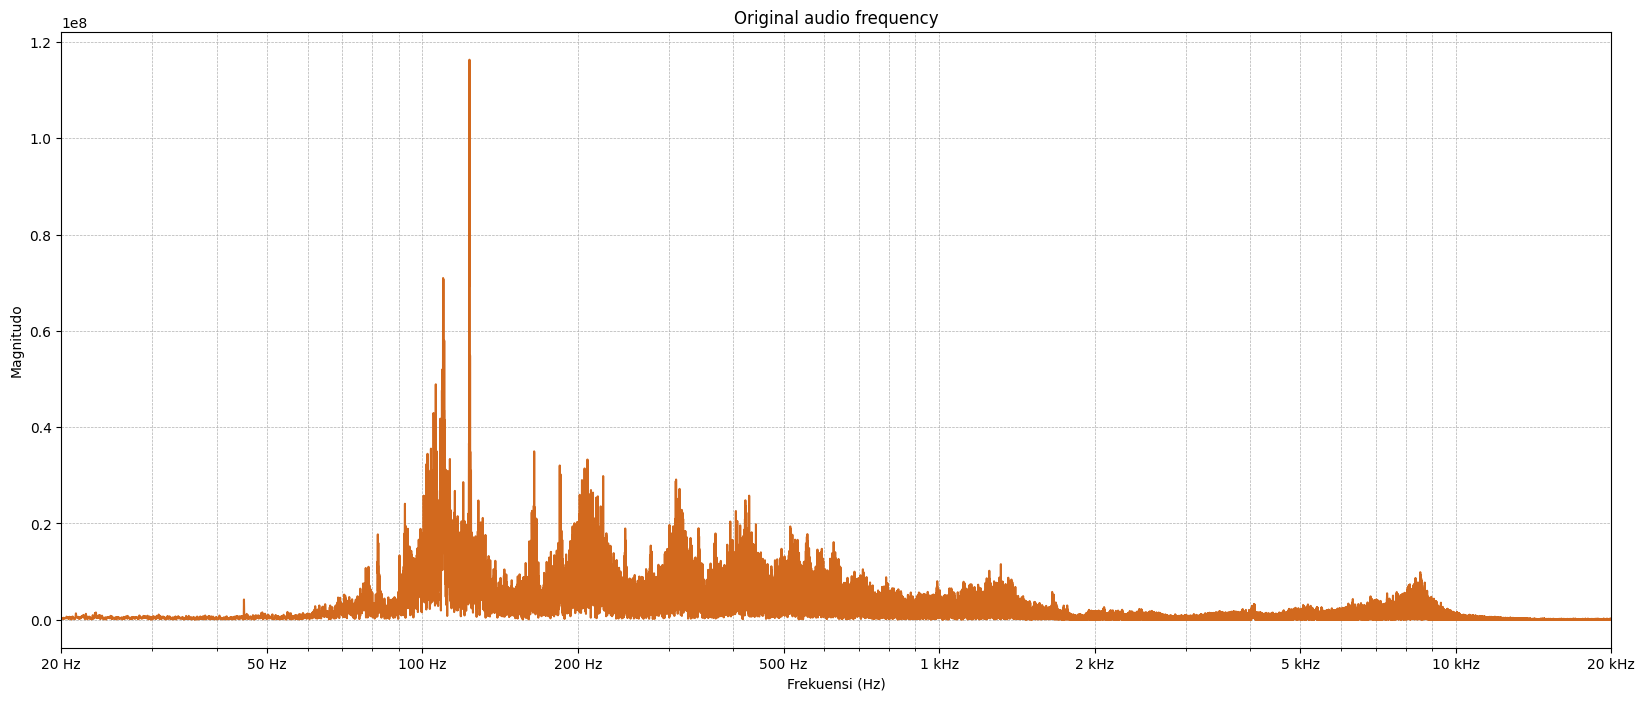

In [36]:
frequency_spectrum(audio_data, sampling_rate, 'Original audio frequency')

#### Menerapkan Filter

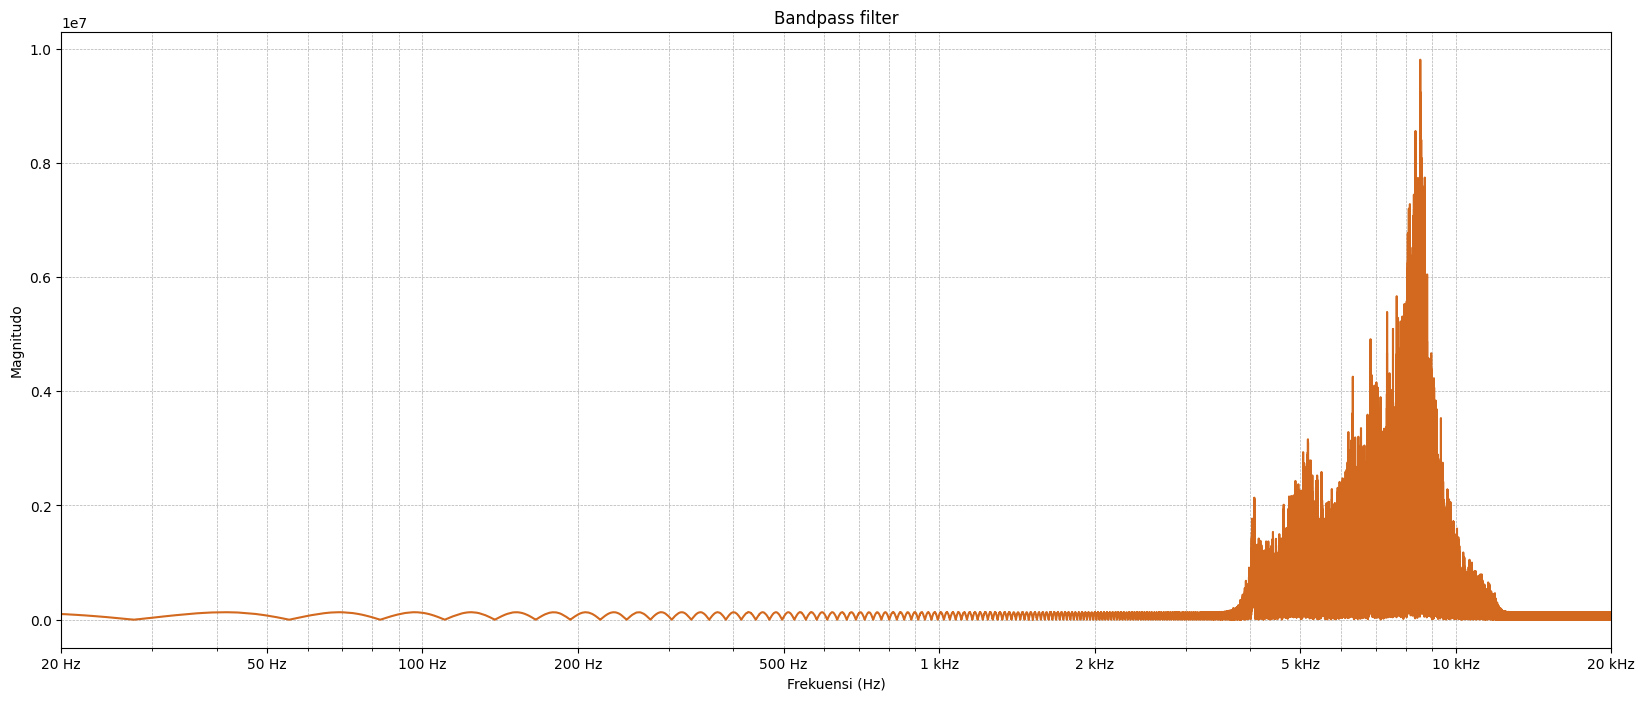

In [38]:
from scipy.signal import butter, filtfilt

cut_off_low_hz = 4000
cut_off_high_hz = 12000
order_cut_off = 12

cut_off_nyquist_low = cut_off_low_hz / (sampling_rate / 2)
cut_off_nyquist_high = cut_off_high_hz / (sampling_rate / 2)

# Membangun filter bandpass
b, a = butter(order_cut_off, [cut_off_nyquist_low, cut_off_nyquist_high], btype='band')

# Menerapkan filter pada audio
bandpass_filtered_audio = filtfilt(b, a, audio_data)
bandpass_filtered_audio = bandpass_filtered_audio.astype(np.int16)

# Menampilkan spektrum frekuensi dari audio yang sudah difilter
frequency_spectrum(bandpass_filtered_audio, sampling_rate, 'Bandpass filter')


## Soal 5: 
### Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.
#### Link ChatGPT: https://chatgpt.com/share/670009d8-d2a0-8006-a15a-eab1d908fcdc




### **Cara Membuat Noise Gate**

#### - Pahami Konsep Noise Gate: Noise gate adalah alat yang mengurangi atau menghilangkan suara yang di bawah level tertentu (threshold). Jika suara lebih keras dari threshold, maka suara tersebut diteruskan. Jika tidak, suara tersebut diblokir.

#### - Pilih Software atau Library: Anda bisa menggunakan perangkat lunak pengolahan audio seperti Audacity, Adobe Audition, atau menggunakan library pemrograman seperti pydub, scipy, atau librosa di Python.

#### - Tentukan level suara di mana noise gate akan mulai bekerja. Ini sering kali ditentukan dengan mendengarkan rekaman.


### **Implementasi**

In [40]:
import numpy as np
import librosa
import soundfile as sf

# Muat audio
audio_path = 'audio_samples/audio1.wav'
y, sr = librosa.load(audio_path)

# Tentukan threshold
threshold = 0.01  # Anda dapat menyesuaikannya

# Terapkan noise gate
y_gate = np.where(np.abs(y) < threshold, 0, y)

# Simpan hasil
output_path = 'audio_samples/audio1_noise_gate.wav'
sf.write(output_path, y_gate, sr)